In [11]:
import numpy as np
import scipy as sp
import scipy.io as io
import scipy.signal as sig
import math as math
import random 
from scipy import integrate
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn-colorblind')
plt.rcParams['image.cmap'] = 'RdBu'

In [102]:
data_path = '/Users/rgao/Documents/Data/NeuroTycho/Propofol/20120730PF_Anesthesia+and+Sleep_Chibi_Toru+Yanagawa_mat_ECoG128/Session2/'
matfile = io.loadmat(data_path + 'ECoG_ch1.mat', squeeze_me=True)
timefile = io.loadmat(data_path + 'Condition.mat', squeeze_me=True)
data = matfile['ECoGData_ch1']

In [103]:
print timefile['ConditionLabel']
print timefile['ConditionIndex']

[u'AnestheticInjection' u'Anesthetized-Start' u'Anesthetized-End'
 u'RecoveryEyesClosed-Start' u'RecoveryEyesClosed-End']
[  85986  553554 1098099 2389557 3590758]


In [104]:
f_axis, f_time, spg = sig.spectrogram(data, fs=1000., nperseg=1000, noverlap=500)

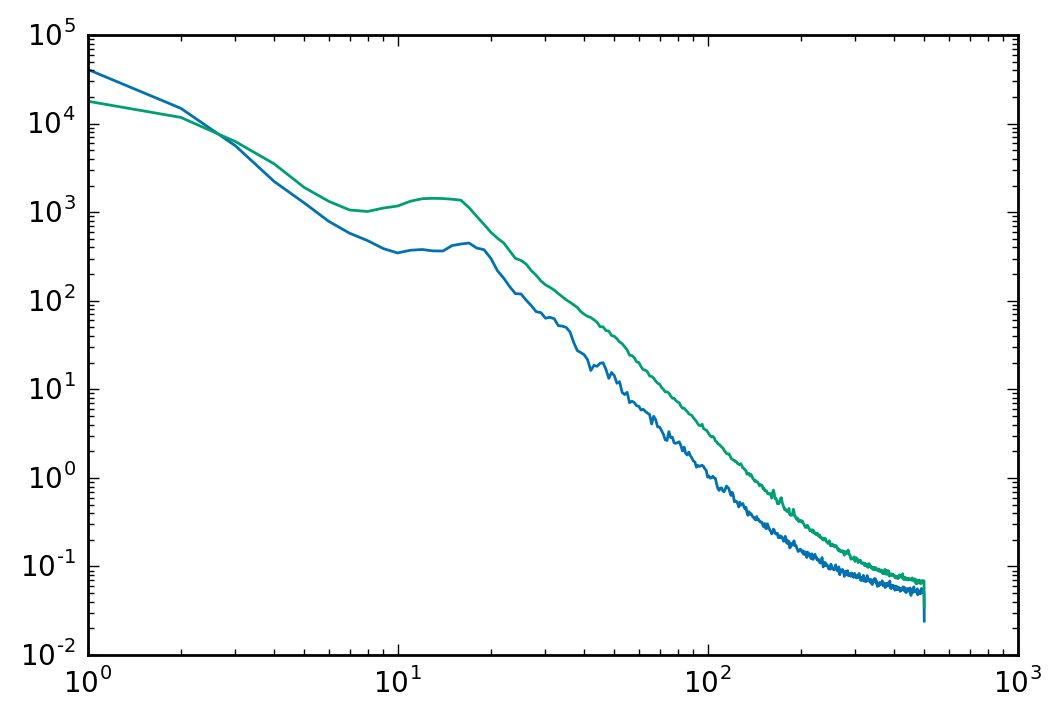

In [105]:
plt.loglog(np.mean(spg[:,np.intersect1d(np.where(f_time>timefile['ConditionTime'][0]),np.where(f_time<timefile['ConditionTime'][1]))],axis=1))
plt.loglog(np.mean(spg[:,np.intersect1d(np.where(f_time>timefile['ConditionTime'][2]),np.where(f_time<timefile['ConditionTime'][3]))],axis=1))

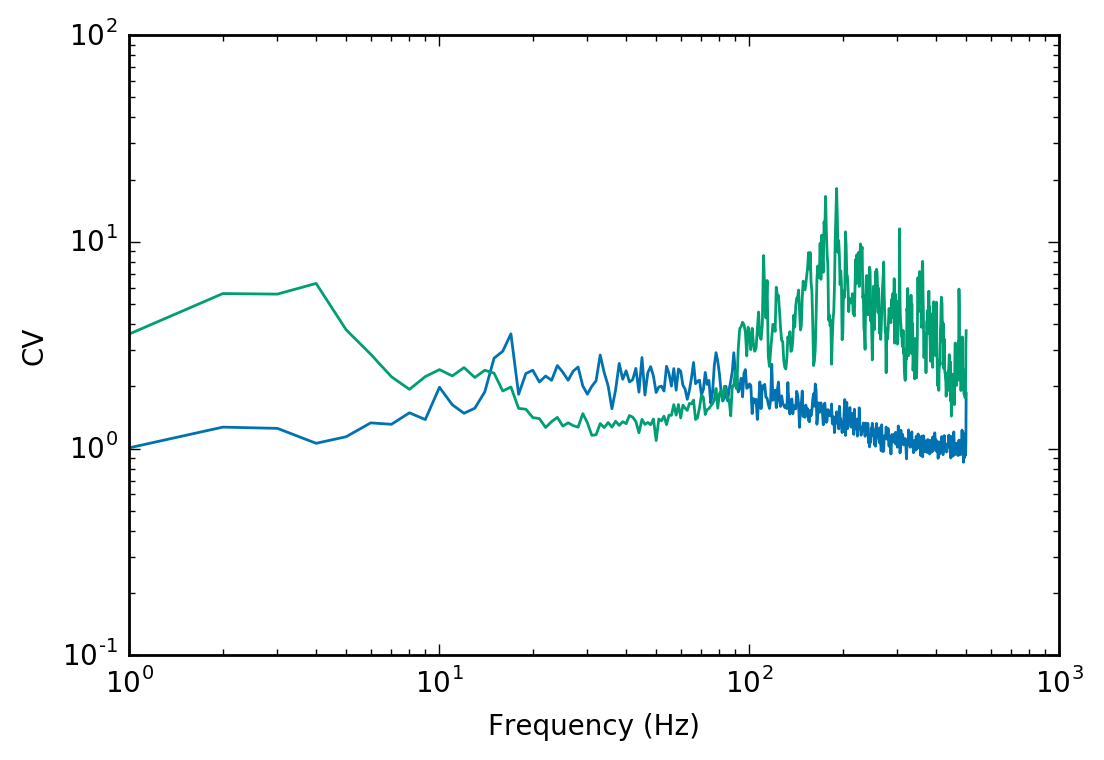

In [107]:
#plt.imshow(np.log10(spg))
# PSD = np.mean(spg,axis = 1)
# PST = np.std(spg,axis=1)
SP1 = spg[:,np.intersect1d(np.where(f_time>timefile['ConditionTime'][1]),np.where(f_time<timefile['ConditionTime'][2]))]
SP2 = spg[:,np.intersect1d(np.where(f_time>timefile['ConditionTime'][3]),np.where(f_time<timefile['ConditionTime'][4]))]
plt.loglog((np.std(SP1,axis=1)/np.mean(SP1,axis=1))**2)
plt.loglog((np.std(SP2,axis=1)/np.mean(SP2,axis=1))**2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('CV')
,#plt.loglog(np.mean(SP1,axis=1))
#plt.figure(figsize=(15,5))
#plt.imshow(np.log10(spg[:,:1000]))